In [1]:
from keras.layers import Input, Dense, Conv2D, Activation, Dropout,BatchNormalization
from keras.models import Model
from keras import backend as K
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.optimizers import RMSprop, adam
from keras import metrics
from matplotlib import pyplot as plt
import keras
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from keras.callbacks import TensorBoard
#%matplotlib inline
from keras.models import Sequential
from keras import metrics
from sklearn.metrics import mutual_info_score



Using TensorFlow backend.


In [43]:
config = tf.ConfigProto() 
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
keras.backend.set_session(session)

In [2]:
data = pd.read_csv("../Datasets/LiverTable.csv")

In [3]:
np.shape(data)

(1139, 18975)

In [5]:
data

,Unnamed: 0,Sample,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000273173,ENSG00000273217,ENSG00000273259,ENSG00000273266,ENSG00000273269,ENSG00000273274,ENSG00000273291,ENSG00000273331,ENSG00000273439,ENSG00000273452
0,1,DO219580,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,DO222354,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DO222355,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,DO222357,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,DO222358,0,0,0,0,2,0,0,0,...,1,1,0,0,1,0,1,0,0,0
5,6,DO224538,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,DO224540,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,DO224542,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,DO224543,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,DO224545,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
b =  range(18975)

In [47]:
data = data[data.columns[1:]].as_matrix()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [48]:
pd.DataFrame(data[0:10,1:10])
data = data[0:, 1:]
np.max(data)
data = data /51

In [49]:
np.max(data)

1.0

In [50]:

inputs = data[:,:]
print(np.shape(inputs))
inputs = inputs.astype('float32')
patients = inputs[:,:] 
patients1 = inputs[:,:]
X_train, X_test,y,y = train_test_split(inputs,b,test_size=0.2 , random_state=42)

print("X_train shape : ",np.shape(X_train))
print("x_test shape : ",np.shape(X_test))
print("patients shape : ",np.shape(patients))


(473, 15856)
X_train shape :  (378, 15856)
x_test shape :  (95, 15856)
patients shape :  (473, 15856)


In [ ]:
X_train.shape

In [52]:
X_train =np.reshape(X_train, [-1, 1, 20159])
X_test = np.reshape(X_test ,[-1, 1, 20159])
patients = np.reshape(patients ,[-1, 1, 20159])

print("X_train shape : ",np.shape(X_train))
print("x_test shape : ",np.shape(X_test))
print("patients shape : ",np.shape(patients))
#print(X_train)

X_train shape :  (378, 1, 15856)
x_test shape :  (95, 1, 15856)
patients shape :  (473, 1, 15856)


In [62]:
input = Input(shape = (1, 20159))


x = Dense(1000,kernel_initializer='glorot_uniform', activation = 'relu')(input)
x = BatchNormalization()(x)
bottleneck = Dense(3, kernel_initializer='glorot_uniform', activation = 'relu', name='bottleneck')(x)
x = Dense(3, kernel_initializer='glorot_uniform', activation = 'relu')(bottleneck)
x = Dense(1000, kernel_initializer='glorot_uniform', activation = 'relu')(x)
x = BatchNormalization()(x)
out = Dense(20159, kernel_initializer='glorot_uniform', activation='sigmoid')(x)


model = Model(input, out)

In [63]:
adam = keras.optimizers.Adam(lr=0.00005)
sgd = keras.optimizers.SGD(lr=0.005,decay=10e-6,momentum=0.9, nesterov=1)
model.compile(optimizer=adam,
              loss='mse')

In [64]:
model.summary()

In [ ]:
earlyStopping =keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')
autoencoder_train = model.fit(X_train,X_train,epochs=10000,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test), callbacks=[earlyStopping])





# Finding the best hyperparameters

In [ ]:
loss = np.zeros((500,40))
val_loss = np.zeros((500,40))

for hid1Neurons in range (1, 5000, 10 ):
    for hid2Neurons in range (1,200,5):
        input = Input(shape = (1, 18977))
        x = Dense(hid1Neurons,kernel_initializer='glorot_uniform', activation = 'relu')(input)
        x = BatchNormalization()(x)
        #50 #70:0.0163 #100: 0.0167 #120:0.0171 #150: 0.0159 #5: 0.0201 #25:0.0257 #batchSize =15 , 500:0.0204
        bottleneck = Dense(hid2Neurons, kernel_initializer='glorot_uniform', activation = 'relu', name='bottleneck')(x) 
        ######################################################################################################
        x = Dense(hid2Neurons, kernel_initializer='glorot_uniform', activation = 'relu')(bottleneck)
        x = Dense(hid1Neurons, kernel_initializer='glorot_uniform', activation = 'relu')(x)
        x = BatchNormalization()(x)
        out = Dense(18977, kernel_initializer='glorot_uniform', activation='sigmoid')(x)
        model = Model(input, out)
        
        #######################################################################################################
        sgd = keras.optimizers.SGD(lr=0.005,decay=10e-6,momentum=0.9, nesterov=1)
        model.compile(optimizer=adam,
              loss='mse')
        #######################################################################################################
        earlyStopping =keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=6,
                              verbose=0, mode='auto')
        autoencoder_train = model.fit(X_train,X_train,epochs=10000,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test), callbacks=[earlyStopping])
        loss[hid1Neurons,hid2Neurons] = autoencoder_train.history['loss']
        val_loss[hid1Neurons,hid2Neurons] = autoencoder_train.history['val_loss']
        print("Number of neurons of 1st layer:{a},2d layer:{b}, Loss is:{c} ".format(a =hid1Neurons, b = hid2Neurons,
                                                                                    c =loss[hid1Neurons,hid2Neurons] ))
        print("Number of neurons of 1st layer:{a},2d layer:{b}, validation Loss is:{c} ".format(a =hid1Neurons, b = hid2Neurons,
                                                                                    c =val_loss[hid1Neurons,hid2Neurons] ))

# Plotting Losses ( Validation and training ) 

In [66]:

epochs = 
loss = autoencoder_train.history['loss']
np.shape(loss)

(579,)

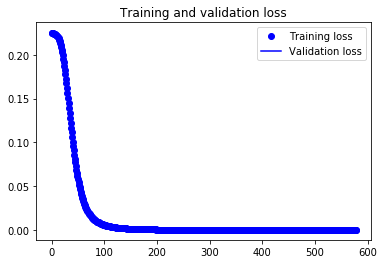

In [67]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Feature extraction 

In [68]:
m2 = Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)
Y = m2.predict(patients)
Y =np.reshape(Y , (473, 3))
df = pd.DataFrame(Y)
df.to_csv("3CNV.csv",index = False)

In [70]:
p=pd.read_csv("3CNV.csv")
np.shape(p)
pd.DataFrame(p)
#p1 = pd.read_csv("500features.csv")
#mean_squared_error(y_true= p , y_pred= p1)

,0,1,2
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,2.405365,0.969846,4.181699
3,6.177290,2.310748,10.639936
4,6.221000,2.593643,10.387173
5,2.393581,1.054199,4.238043
6,2.480137,1.004355,4.121332
7,2.377229,1.017424,4.137586
8,2.518858,0.913558,4.099765
9,2.432282,0.971981,4.137338
